## Data Acquisiton: IMDB Movies Data 2006-2016

Sumber data dari https://www.kaggle.com/PromptCloudHQ/imdb-data (PromptCloud 2017-06-26)

Data yang digunakan adalah data set 1000 film paling populer selama rentang waktu 10 tahun (2006-2016). Data field mencakup:
Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore

Rank: Movie rank order

Title: The title of the film

Genre: A comma-separated list of genres used to classify the film

Description: Brief one-sentence movie summary

Director: The name of the film's director

Actors: A comma-separated list of the main stars of the film

Year: The year that the film released as an integer.Runtime (Minutes): The duration of the film in minutes.

Rating: User rating for the movie 0-10

Votes: Number of votes

Revenue (Millions): Movie revenue in millions

Metascore: An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.

## Preparation 

In [25]:
#import semua library yang akan digunakan

import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for visualization
import plotly as py #for plotting
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

## Data Modelling

### 1. Reading Data

In [4]:
#baca datasource
data = pd.read_csv('IMDB-Movie-Data.csv')

In [5]:
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [6]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### See how many missing data points we have

In [7]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
missing_values_count

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
# get the number of missing data points per row
#missing_values_count = data.isnull().sum(axis=1)
#missing_values_count[0:]

In [9]:
jumlah_sel = np.product(data.shape)
jumlah_mv = missing_values_count.sum()

# percent of data that is missing
print('persentase missing value: ', (jumlah_mv/jumlah_sel) * 100, '%')

persentase missing value:  1.6 %


In [10]:
#removing row which have empty cell(s)
data_clean = data.dropna(axis=0)
data_clean

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [11]:
# just how much data did we lose?
print("Rows in original dataset: %d \n" % data.shape[0])
print("Data setelah rows with empty value dihapus: %d" % data_clean.shape[0])

Rows in original dataset: 1000 

Data setelah rows with empty value dihapus: 838


In [12]:
data_clean.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue'
    }, inplace=True)

data_clean.columns

C:\Users\Alfian Alwi\Anaconda3\envs\EDA\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')

In [13]:
data_clean.to_csv("data_clean.csv", index=False)

In [14]:
data_clean

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


## Multiple Linear Regression

#### Langkah Pertama : Mengimport Library yang diperlukan

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Langkah Kedua : Mengimport Dataset yang sudah ter-cleaning

In [16]:
datac = pd.read_csv('data_clean.csv')
datac

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
833,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
834,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
835,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
836,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


#### Langkah Ketiga : Memilih Variabel X dan Variabel Y

In [17]:
feature_names=['Runtime','Rating','Votes','Metascore']
X=datac[feature_names]
Y=datac.Revenue

In [18]:
print(X)

     Runtime  Rating   Votes  Metascore
0        121     8.1  757074       76.0
1        124     7.0  485820       65.0
2        117     7.3  157606       62.0
3        108     7.2   60545       59.0
4        123     6.2  393727       40.0
..       ...     ...     ...        ...
833       97     5.9  140900       37.0
834       88     6.7  164088       48.0
835       94     5.5   73152       46.0
836       98     6.2   70699       50.0
837       87     5.3   12435       11.0

[838 rows x 4 columns]


In [19]:
print(Y)   #revenue

0      333.13
1      126.46
2      138.12
3      270.32
4      325.02
        ...  
833     60.13
834     54.72
835     17.54
836     58.01
837     19.64
Name: Revenue, Length: 838, dtype: float64


#### Langkah Ke-Empat : Membagi data menjadi data latih and data uji

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

#### Langkah Ke-Lima : Membuat model Multiple Linear Regression dari data latih

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#### Langkah Ke- Enam : Menghitung RMSE
RMSE adalah metode alternatif untuk mengevaluasi teknik peramalan yang digunakan untuk mengukur tingkat akurasi hasil prakiraan suatu model. RMSE merupakan nilai rata-rata dari jumlah kuadrat kesalahan, juga dapat menyatakan ukuran besarnya kesalahan yang dihasilkan oleh suatu model prakiraan. Nilai RMSE rendah menunjukkan bahwa variasi nilai yang dihasilkan oleh suatu model prakiraan mendekati variasi nilai obeservasinya.

In [22]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

69.94248113260831


#### Langkah Ke-Tujuh : Menentukan Model Multiple Linear Regresi

In [23]:
import statsmodels.api as sm
X = sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
model.summary()

C:\Users\Alfian Alwi\Anaconda3\envs\EDA\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     154.9
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           4.79e-99
Time:                        09:06:37   Log-Likelihood:                -4851.8
No. Observations:                 838   AIC:                             9714.
Df Residuals:                     833   BIC:                             9737.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.3439     27.427      3.950      0.000      54.509     162.179
Runtime        0.3786      0.166      2.282      0.023       0.053       0.704
Rating       -21.4717      4.744     -4.526      0.000     -30.784     -12.159
Votes          0.0004   1.72e-05     21.981      0.000       0.000       0.000
Metascore      0.1032      0.219      0.471      0.638      -0.326       0.533
==============================================================================
Omnibus:                      448.534   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5698.564
Skew:                           2.135   Prob(JB):                         0.00
Kurtosis:                      15.040   Cond. No.                     2.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Lihatlah pada bagian p value nya (P>|t|). Di mana semakin kecil nilai p maka semakin baik variabel tersebut. Semakin tinggi maka semakin buruk pula. Cara mudahnya adalah nilai p di atas 0.05 maka ia tidak signifikan sebagai sebuah variabel independen untuk memprediksi variabel dependen. Maka dari hasil diatas untuk :

1. p-value runtime sebesar 0.023 < 0.05 maka ada pengaruh secara signifikan antara runtime dan revenue.
2. p-value rating sebesar 0.000 < 0.05 maka ada pengaruh secara signifikan antara rating dan revenue.
3. p-value votes sebesar 0.000 < 0.05 maka ada pengaruh secara signifikan antara votes dan revenue.
4. p-value metascore sebesar 0.0638 > 0.05 maka tidak ada pengaruh secara signifikan antara metascore dan revenue.
Pada hasil diatas diketahui bahwa fungsi yang dibuat menghasilkan model multiple linear regression yaitu:
    
Revenue = 108.3439 + 0.3786Runtime - 21.4717Rating + 0.0004Votes + 0.1032Metascore

Berdasarkan model diatas artinya jika Runtime, Rating, Votes, dan Metascore mendekati nol maka nilai Revenue sebesar 108.3439.
1. Jika Runtime naik satu satuan maka akan meningkatkan nilai revenue sebesar 0.3786.
2. Jika Rating naik satu satuan maka akan mengurangi nilai revenue sebesar 21.4717.
3. Jika Votes naik satu satuan maka akan meningkatkan nilai revenue sebesar 0.0004.
4. Jika Metascore naik satu satuan maka akan meningkatkan nilai revenue sebesar 0.1032.

Dengan R-square sebesar 0.427 atau 42.7% variabel artinya sebesar 42.7% Variabel independen mampu menjelaskan setiap variasi dari variabel dependen.¶

# Support Vector Regression

Support Vector Regression (SVR) adalah salah satu metode regresi dengan menggunakan machine learning yang sangat populer. Konsep dari SVR adalah membuat sebuah hyperplane yang mendekati titik -titik data yang akan diprediksi, sehingga diperoleh estimasi yang memiliki nilai error yang sangat kecil.

In [26]:
def transformasi_data(X,x_tr):
    scaler=StandardScaler()
    scaler.fit(X)
    x_all_tr=scaler.transform(x_tr)
    return x_all_tr
x_all_tr=transformasi_data(X, X)

In [27]:
x_all_tr

array([[ 0.        ,  0.34461595,  1.46561363,  2.9217161 ,  0.96945647],
       [ 0.        ,  0.50713039,  0.21166649,  1.51613666,  0.32019392],
       [ 0.        ,  0.12793002,  0.55365208, -0.18459715,  0.14312231],
       ...,
       [ 0.        , -1.11801403, -1.49826141, -0.62221948, -0.80125957],
       [ 0.        , -0.90132811, -0.70029506, -0.63493039, -0.5651641 ],
       [ 0.        , -1.49721439, -1.7262518 , -0.93684181, -2.86709495]])

Kemudian dilakukan penentuan parameter terbaik pada SVR dengan kernel RBF. Disini digunakan beberapa nilai gamma dari 5 hingga 10.

In [29]:
def model (x_all_tr, Y):
    gcs=GridSearchCV(SVR(kernel='rbf'),
                    param_grid={'gamma':[5,6,7,8,9,10]},
                    cv=5,
                    scoring='neg_mean_squared_error')
    grid_result=gcs.fit(x_all_tr, Y)
    best_params=grid_result.best_params_
    best_svr=SVR(kernel='rbf',C=1e3, gamma=best_params["gamma"])
    best_svr.fit(x_all_tr, Y)
    y_pred=best_svr.predict(x_all_tr)
    return y_pred, best_svr
y_pred, best_svr=model(x_all_tr, Y)

C:\Users\Alfian Alwi\Anaconda3\envs\EDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [30]:
best_svr

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

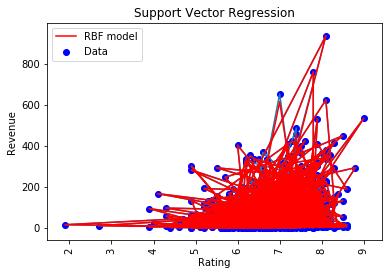

In [33]:
def plot(y_pred, datac):
    fig, ax1 = plt.subplots()
    plt.plot(datac.Rating, datac.Revenue)
    _ = plt.xticks(rotation=90)
    plt.plot(datac.Rating, y_pred, c='r', label='RBF model')
    plt.scatter(datac.Rating, datac.Revenue, c='b', label='Data')
    plt.xlabel('Rating')
    plt.ylabel('Revenue')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
plot(y_pred, datac)

Jika dilihat dari plot yang dihasilkan dapat dilihat bahwa nilai prediksi sudah mendekati nilai data sebenarnya. Namun untuk memastikan bahwa model ini sudah bagus atau tidak dapat dipastikan dengan melihat Mean Square Error (MSE)dan Mean Ablosute Error(MAE). MSE dan MAE yang kecil dan mendekati nol menandakan bahwa model yang diperoleh sudah bagus.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MSE: {0:.3f}'.format(mean_squared_error(Y, y_pred)))
print('MAE: {0:.3f}'.format(mean_absolute_error(Y, y_pred)))
print('R^2: {0:.3f}'.format(r2_score(Y, y_pred)))

MSE: 316.928
MAE: 2.435
R^2: 0.971


Bisa dilihat bahwa MSE dan MAE yang diperoleh sudah kecil dan mendekati nol, ini berarti bahwa model yang diperoleh sudah baik untuk digunakan pada prediksi saham. R² yang bernilai 1 menandakan bahwa variabel berpengaruh terhadap variabel Y(Revenue) sebesar 100% .

## Clustering

### By Runtime

In [64]:
# mengelompokkan rating ke 3 kelompok
ratingCatArray = []
for index, rows in datac.iterrows():
    rating = rows["Rating"]
    if rating > 1 and rating <= 4:
        ratingCatArray.append("Rendah")
    elif rating > 4 and rating <= 7:
        ratingCatArray.append("Sedang")
    elif rating > 7 and rating <= 9:
        ratingCatArray.append("Tinggi")
datac = datac.assign(RatingCategory = ratingCatArray)
datac.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,RatingCategory
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Tinggi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Sedang
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Tinggi
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Tinggi
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Sedang


In [65]:
lala=['Runtime','Rating','RatingCategory']
movies1=data_clean[lala]
movies1.head()

,Runtime,Rating,RatingCategory
0,121,8.1,Tinggi
1,124,7.0,Sedang
2,117,7.3,Tinggi
3,108,7.2,Tinggi
4,123,6.2,Sedang


In [66]:
movies1.sort_values(by=['RatingCategory'])

,Runtime,Rating,RatingCategory
525,103,3.9,Rendah
871,85,2.7,Rendah
829,87,1.9,Rendah
237,85,3.9,Rendah
616,101,4.0,Rendah
...,...,...,...
346,127,7.7,Tinggi
341,119,7.4,Tinggi
338,126,7.8,Tinggi
381,124,7.4,Tinggi


In [67]:
movies1['RatingCategory'] = pd.Categorical(movies1['RatingCategory'])
print(movies1['RatingCategory'].cat.categories.tolist())
movies1['RatingCategory'] = movies1['RatingCategory'].cat.codes

['Rendah', 'Sedang', 'Tinggi']


C:\Users\Alfian Alwi\Anaconda3\envs\EDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alfian Alwi\Anaconda3\envs\EDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
data = movies1.values[:,0:2]
label = movies1.values[:, 2]
print(label)

[2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1.
 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2.
 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2.
 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 1. 1.
 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2.
 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1.
 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1.
 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 0. 2. 1. 2. 2. 1. 1.
 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2.
 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1.
 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2.
 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1.
 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 1. 1.

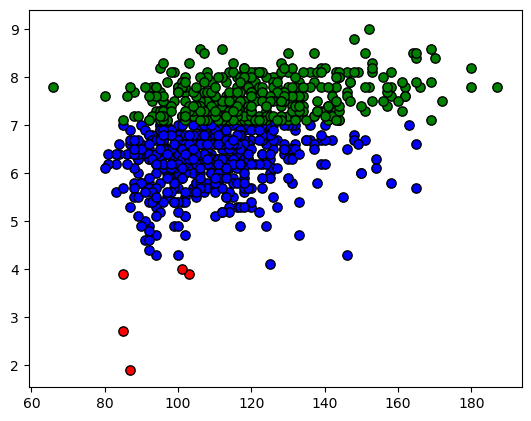

In [69]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(14,5), dpi=100, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.scatter(data[label == 0, 0], data[label == 0, 1], 
            s = 45, c = 'red', label = 'Rendah', edgecolor='k')
plt.scatter(data[label == 1, 0], data[label == 1, 1], 
            s = 45, c = 'blue', label = 'Sedang', edgecolor='k')
plt.scatter(data[label == 2, 0], data[label == 2, 1], 
            s = 45, c = 'green', label = 'Tinggi', edgecolor='k')

In [70]:
from sklearn.cluster import KMeans
models = KMeans(n_clusters=3)
models.fit(data)
prediction = models.predict(data)
centroids = models.cluster_centers_
print(prediction)

[1 1 1 0 1 0 1 2 1 1 1 1 0 0 0 2 1 1 1 1 2 0 1 0 1 1 1 2 0 0 2 2 1 1 0 1 1
 0 2 1 1 2 0 1 0 2 2 0 0 1 0 2 1 1 1 1 1 1 0 0 1 0 0 0 2 2 2 2 1 2 1 2 2 2
 1 1 2 2 1 2 1 2 1 2 1 0 0 0 2 1 1 2 1 0 1 1 0 0 1 1 1 0 1 0 0 1 2 0 2 0 2
 0 0 2 2 1 0 0 1 2 1 2 2 1 0 1 1 2 2 0 2 1 1 1 2 0 1 0 1 1 1 1 0 1 1 2 1 1
 0 2 2 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 2 1 2 1 0 1 2 1 1 1 1 0 1 1
 1 0 2 1 1 2 0 1 0 1 0 2 1 2 1 0 0 1 0 2 1 1 0 0 0 0 1 1 0 0 1 1 2 0 1 1 1
 0 0 2 2 1 0 1 0 0 1 1 0 0 1 1 0 0 2 0 2 2 1 0 1 1 2 1 1 1 1 1 0 1 0 1 0 1
 1 0 2 1 0 0 1 2 1 1 0 0 0 2 1 0 1 1 2 0 2 2 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 1 2 1 1 1 1 0 1 1 0 2 1 1 2 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 2 1 0 1 1
 1 1 0 1 1 0 1 0 1 2 0 1 0 2 1 1 0 1 1 0 1 1 1 1 0 0 1 0 2 0 2 0 0 1 0 0 0
 2 0 1 0 0 0 0 2 0 1 2 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 2 1 2 2 1 0 2 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0
 0 0 0 1 0 1 0 2 1 2 1 1 1 1 0 0 0 1 2 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 1 1 2 0 0 

In [71]:
print(centroids)

[[ 98.64917127   6.54502762]
 [119.90384615   6.8989011 ]
 [149.20535714   7.40982143]]


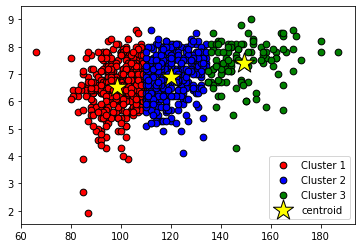

In [72]:
plt.subplot(1,1,1)
plt.scatter(data[prediction == 0, 0], data[prediction == 0, 1], 
            s = 45, c = 'red', label = 'Cluster 1', edgecolor='k')
plt.scatter(data[prediction == 1, 0], data[prediction == 1, 1], 
            s = 45, c = 'blue', label = 'Cluster 2', edgecolor='k')
plt.scatter(data[prediction == 2, 0], data[prediction == 2, 1], 
            s = 45, c = 'green', label = 'Cluster 3', edgecolor='k')
plt.scatter(models.cluster_centers_[:,0],
            models.cluster_centers_[:,1],
            s = 450, c='yellow', label = 'centroid', edgecolor='k', marker='*')

plt.rcParams['figure.dpi'] = 100
plt.legend()
plt.show()

Jadi, hasil clustering diatas mengelompokkan berdasarkan runtime.
1. Cluster 1 : film dengan rating 1 sampai 9, dengan runtime 60 sampai sekitar 110.
2. Cluster 2 : film dengan rating 1 sampai 9, dengan runtime 110 sampai sekitar 140.
3. Cluster 3 : film dengan rating 1 sampai 9, dengan runtime 140 keatas.

## Data Visualization

### By Rating

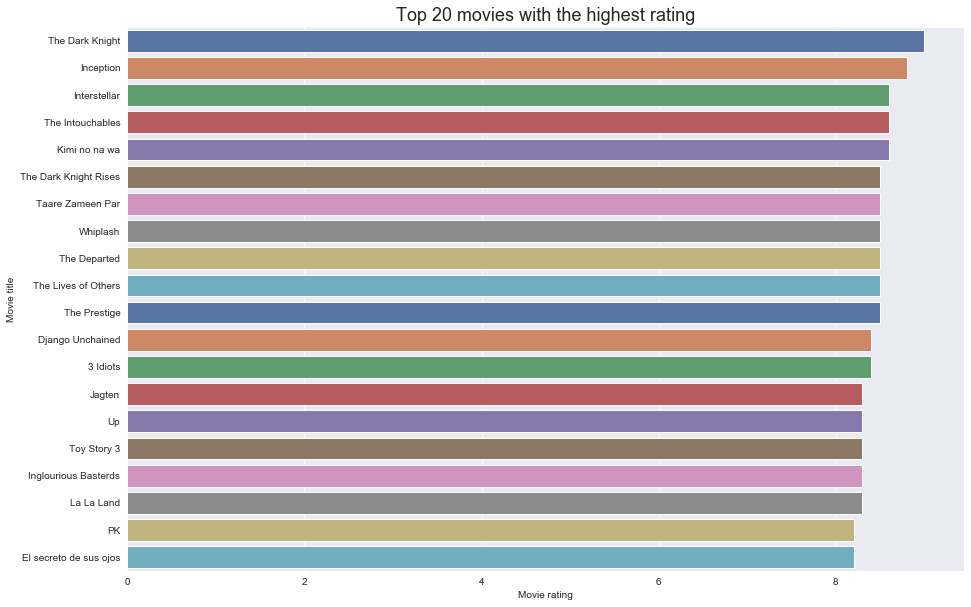

In [114]:
#Top 20 movies with the highest rating
most_rated = datac.sort_values('Rating', ascending = False).head(20).set_index('Title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['Rating'], most_rated.index, palette='deep')
plt.title("Top 20 movies with the highest rating", fontsize=18)
plt.xlabel("Movie rating")
plt.ylabel("Movie title")
plt.show()

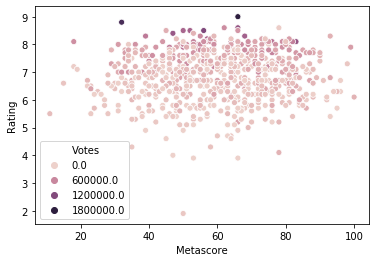

In [37]:
#Corelation between Metascore and rating of the movies
sns.scatterplot(x=datac['Metascore'], y=data_clean['Rating'], hue = data_clean['Votes'])
plt.show()

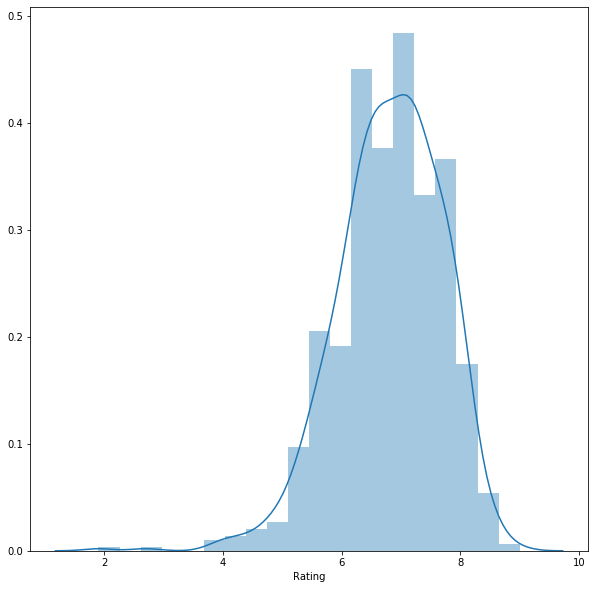

In [38]:
#the most common Rating for movies in this dataset
plt.figure(figsize=(10,10))
rating= datac.Rating.astype(float)
sns.distplot(rating, bins=20)
plt.show()

### By Revenue

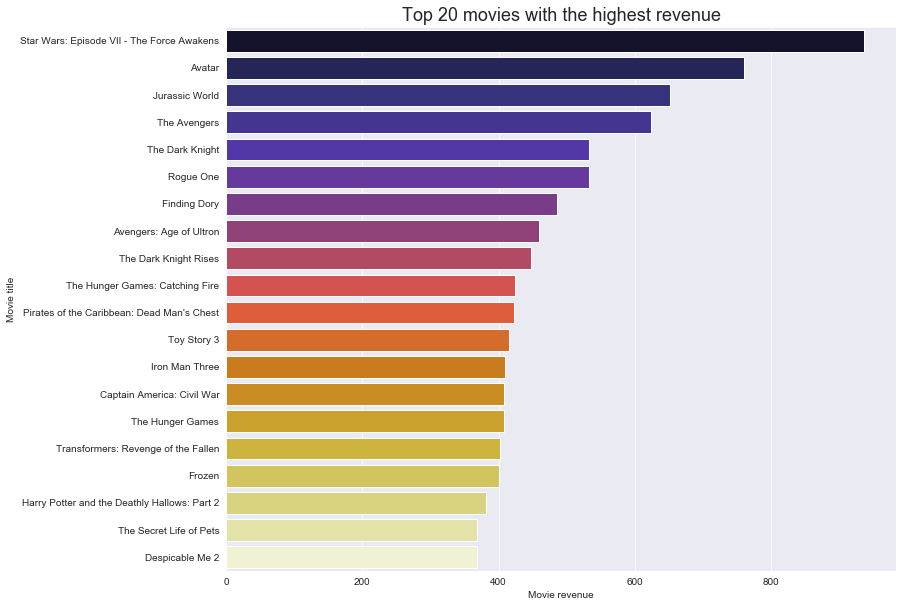

In [100]:
#Top 20 movies with the highest revenue
highest_revenue = datac.sort_values('Revenue', ascending = False).head(20).set_index('Title')
plt.figure(figsize=(12,10))
sns.barplot(highest_revenue['Revenue'], highest_revenue.index, palette='CMRmap')
plt.title("Top 20 movies with the highest revenue", fontsize=18)
plt.xlabel("Movie revenue")
plt.ylabel("Movie title")
plt.show()

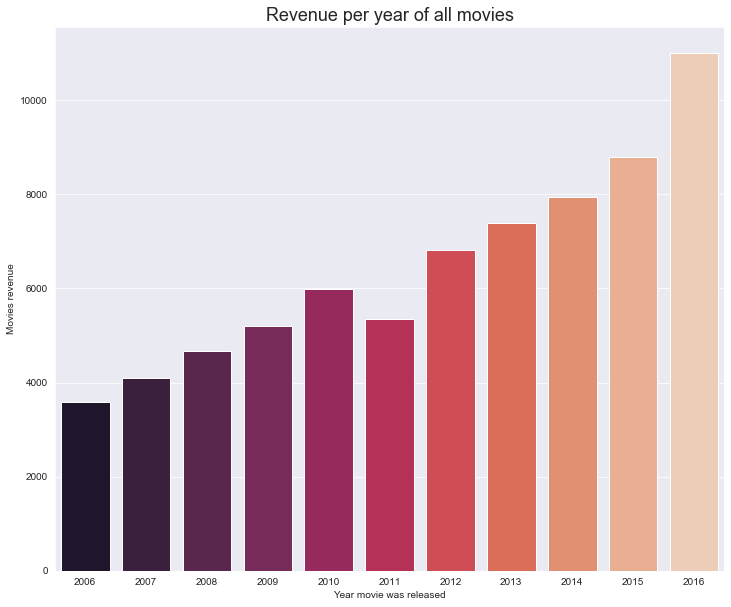

In [101]:
#Revenue of all the movies per year
df = datac.groupby('Year')['Revenue'].sum().to_frame().reset_index().sort_values(by='Revenue')

plt.figure(figsize=(12,10))
sns.barplot(df['Year'], df['Revenue'], palette='rocket')
plt.title("Revenue per year of all movies", fontsize=18)
plt.xlabel("Year movie was released")
plt.ylabel("Movies revenue")
plt.show()

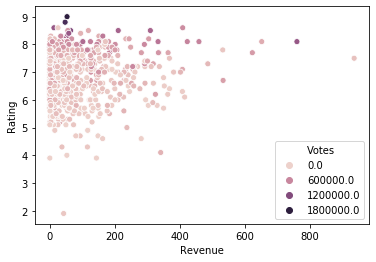

In [36]:
#Corelation between revenue and rating of the movies
sns.scatterplot(x=datac['Revenue'], y=data_clean['Rating'], hue = data_clean['Votes'])
plt.show()

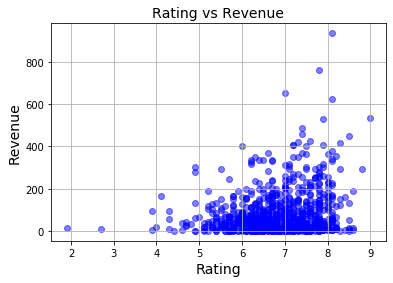

In [42]:
plt.scatter( datac['Rating'],datac['Revenue'], color='blue',alpha=.5)
plt.title('Rating vs Revenue', fontsize=14)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()

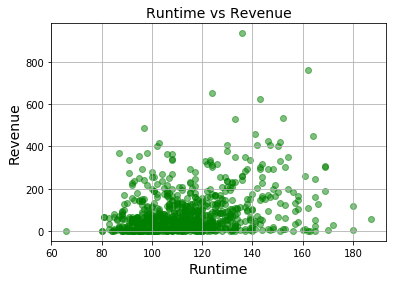

In [43]:
plt.scatter( datac['Runtime'],datac['Revenue'], color='green',alpha=.5)
plt.title('Runtime vs Revenue', fontsize=14)
plt.xlabel('Runtime', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()

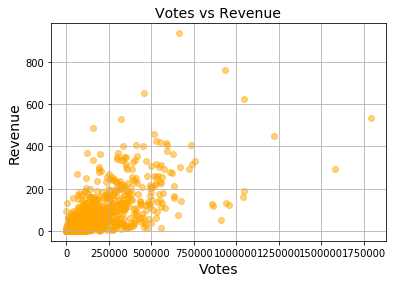

In [45]:
plt.scatter( datac['Votes'],datac['Revenue'], color='orange',alpha=.5)
plt.title('Votes vs Revenue', fontsize=14)
plt.xlabel('Votes', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()

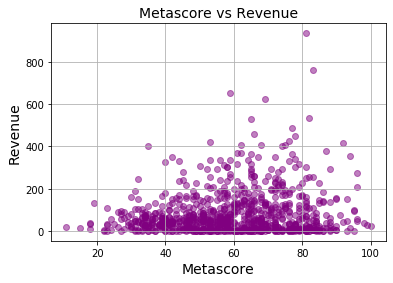

In [47]:
plt.scatter( datac['Metascore'],datac['Revenue'], color='purple',alpha=.5)
plt.title('Metascore vs Revenue', fontsize=14)
plt.xlabel('Metascore', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()

In [107]:
high_revenue = datac[datac['Revenue'] > 550.00]
high_revenue.head()

high_revenue_sorted = high_revenue.sort_values(by = 'Year')
high_revenue_sorted

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
76,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
65,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
41,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
74,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0


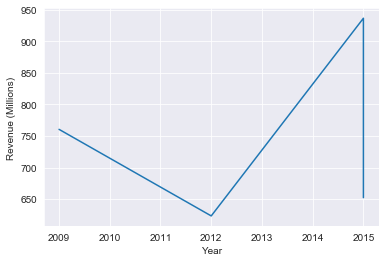

In [109]:
# Plotting year vs revenue
year = high_revenue_sorted['Year'].values
revenue = high_revenue_sorted['Revenue'].values

plt.plot(year, revenue)
plt.xlabel("Year")
plt.ylabel("Revenue (Millions)")
plt.show()

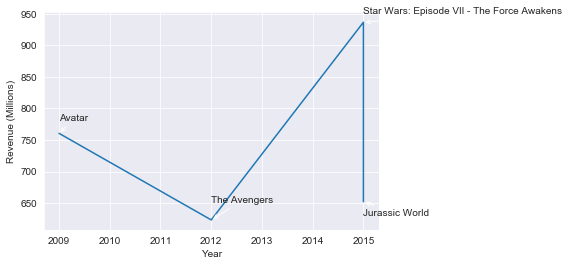

In [110]:
# Plotting the highest revenue and annotating the high revenue movie
fig,ax = plt.subplots()
ax.annotate(high_revenue_sorted['Title'].iloc[0],
            xy = (2009,760), xycoords = 'data',
            xytext = (2009,780), textcoords = 'data',
            arrowprops = dict(arrowstyle = '->',
                             connectionstyle = 'arc3'),
           )

ax.annotate(high_revenue_sorted['Title'].iloc[1],
            xy = (2012,623), xycoords = 'data',
            xytext = (2012,650), textcoords = 'data',
            arrowprops = dict(arrowstyle = '->',
                             connectionstyle = 'arc3'),
           )

ax.annotate(high_revenue_sorted['Title'].iloc[2],
            xy = (2015,936), xycoords = 'data',
            xytext = (2015,950), textcoords = 'data',
            arrowprops = dict(arrowstyle = '->',
                             connectionstyle = 'arc3'),
           )

ax.annotate(high_revenue_sorted['Title'].iloc[3],
            xy = (2015,652), xycoords = 'data',
            xytext = (2015,630), textcoords = 'data',
            arrowprops = dict(arrowstyle = '->',
                             connectionstyle = 'arc3'),
           )


year = high_revenue_sorted['Year'].values
revenue = high_revenue_sorted['Revenue'].values

plt.plot(year, revenue)
plt.xlabel("Year")
plt.ylabel("Revenue (Millions)")
#plt.axis([2009,2015,0,950])
plt.show()

Dari grafik di atas berdasarkan film dari 2006-2016 diperoleh hasil bahwa :

Sebuah film dapat menghasilkan pendapatan tinggi jika filmnya adalah action, sci-fi atau fantasi atau ketiganya (penggunaan teknologi dalam pembuatan film). dapat dilihat bahwa keempat film diatas menggunakan teknologi yang menakjubkan dan efek 3D, menjadikan pengalaman menonton film yang luar biasa.


In [111]:
low_revenue = data_clean[data_clean['Revenue'] < 0.02]
low_revenue.head()
low_revenue_sorted = low_revenue.sort_values(by = 'Year')
low_revenue_sorted

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
677,678,"Love, Rosie","Comedy,Romance",Rosie and Alex have been best friends since th...,Christian Ditter,"Lily Collins, Sam Claflin, Christian Cooke, Ja...",2014,102,7.2,80415,0.01,44.0
961,962,Into the Forest,"Drama,Sci-Fi,Thriller","After a massive power outage, two sisters lear...",Patricia Rozema,"Ellen Page, Evan Rachel Wood, Max Minghella,Ca...",2015,101,5.9,10220,0.01,59.0
68,69,Wakefield,Drama,A man's nervous breakdown causes him to leave ...,Robin Swicord,"Bryan Cranston, Jennifer Garner, Beverly D'Ang...",2016,106,7.5,291,0.01,61.0
231,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,0.00,50.0
321,322,Lovesong,Drama,The relationship between two friends deepens d...,So Yong Kim,"Riley Keough, Jena Malone, Jessie Ok Gray, Car...",2016,84,6.4,616,0.01,74.0


Dapat dilihat pada tabel diatas berdasarkan film dari tahun 2006 - 2016, film dengan pendapatan terendah adalah film dengan terdapat unsur genre Drama didalamnya. 

In [112]:
high_rating = data_clean[data_clean['Rating'] >= 8.60]
high_rating.head()
high_rating_sorted = high_rating.sort_values(by = 'Year')
high_rating_sorted

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0


Dapat dilihat pada tabel diatas berdasarkan film dari tahun 2006 - 2016, film dengan rating tertinggi adalah film yang disutradai oleh Christopher Nolan.

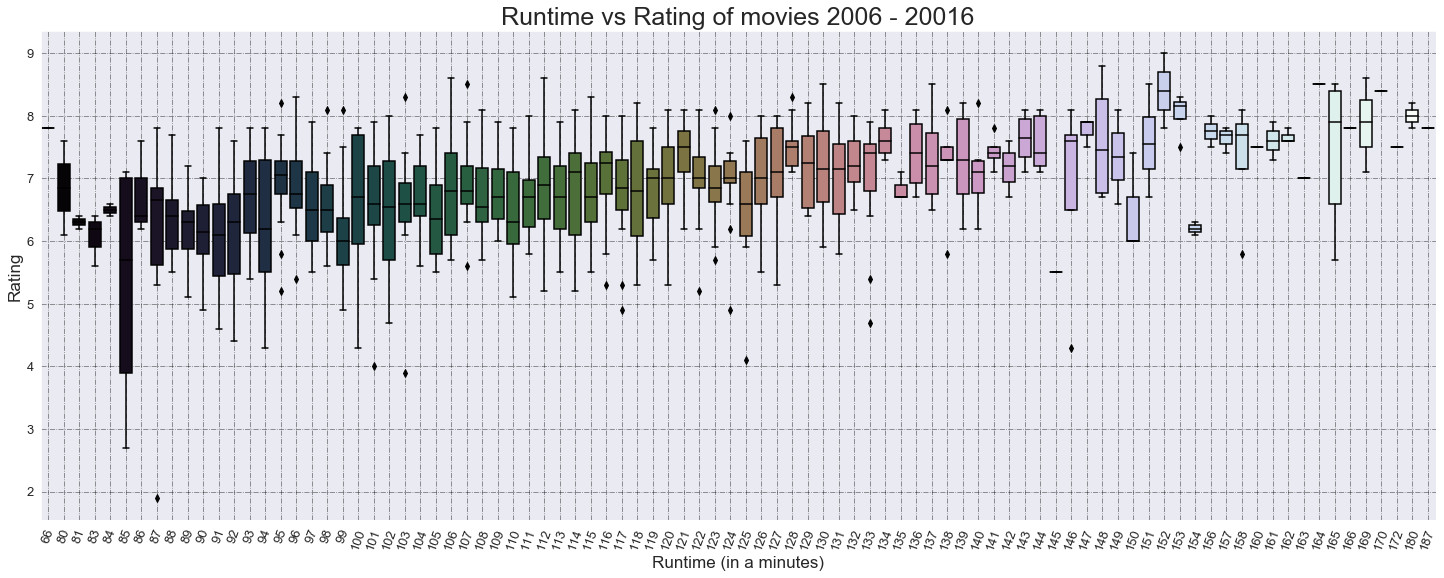

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (25,9))
sns.set_style('darkgrid')

fig = sns.boxplot( x=data_clean.Runtime, y=data_clean.Rating, palette = "cubehelix")

plt.ylabel('Rating', fontsize = 17)
plt.xlabel('Runtime (in a minutes)', fontsize = 17)
plt.xticks(rotation = 70, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Runtime vs Rating of movies 2006 - 20016', fontsize = 25)
plt.grid(True, alpha = 0.5, linestyle = '-.', color = '#000000')
plt.show()

### By Director

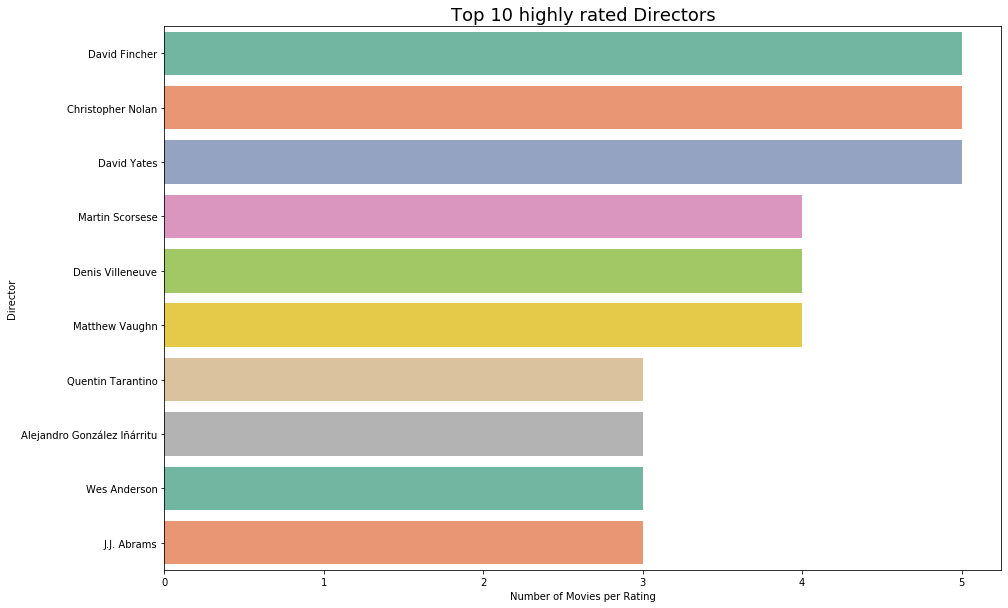

In [39]:
#The top 10 highly rated Directors
high_rated_director = datac[datac['Rating']>=7.5]
high_rated_director = high_rated_director.groupby('Director')['Title'].count().reset_index().sort_values('Title', ascending = False).head(10).set_index('Director')

plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_director['Title'], high_rated_director.index, palette='Set2')
plt.title("Top 10 highly rated Directors", fontsize=18)
plt.xlabel("Number of Movies per Rating")
plt.ylabel("Director")
plt.show()

### By Year

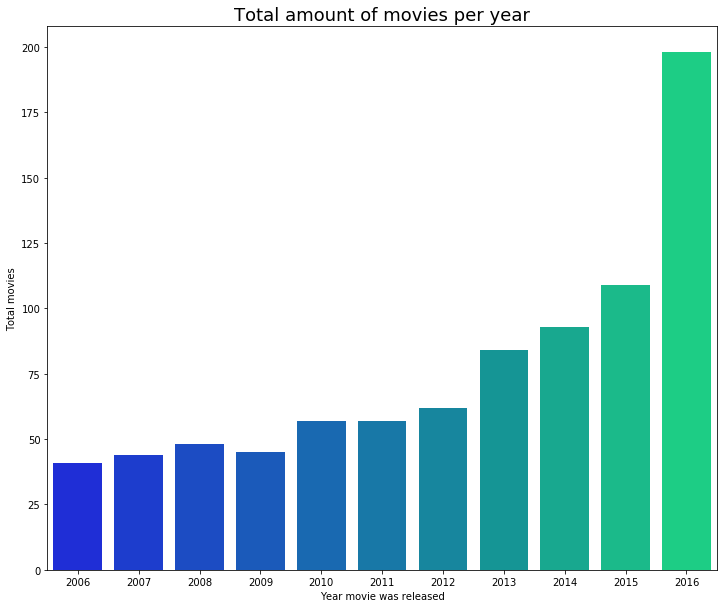

In [40]:
#Total amount of movies per year
df = datac.groupby('Year')['Title'].count().to_frame().reset_index().sort_values(by='Year')

plt.figure(figsize=(12,10))
sns.barplot(df['Year'], df['Title'], palette='winter')
plt.title("Total amount of movies per year", fontsize=18)
plt.xlabel("Year movie was released")
plt.ylabel("Total movies")
plt.show()

### By Genre

In [48]:
semua_genre = data_clean['Genre'].unique()
genres = semua_genre.tolist()

In [49]:
genres

['Action,Adventure,Sci-Fi',
 'Adventure,Mystery,Sci-Fi',
 'Horror,Thriller',
 'Animation,Comedy,Family',
 'Action,Adventure,Fantasy',
 'Comedy,Drama,Music',
 'Action,Adventure,Biography',
 'Adventure,Drama,Romance',
 'Adventure,Family,Fantasy',
 'Biography,Drama,History',
 'Animation,Adventure,Comedy',
 'Action,Comedy,Drama',
 'Action,Thriller',
 'Biography,Drama',
 'Drama,Mystery,Sci-Fi',
 'Adventure,Drama,Thriller',
 'Drama',
 'Comedy',
 'Action,Adventure,Drama',
 'Drama,Thriller',
 'Action,Adventure,Comedy',
 'Action,Horror,Sci-Fi',
 'Adventure,Drama,Sci-Fi',
 'Action,Adventure,Western',
 'Comedy,Drama',
 'Action,Crime,Thriller',
 'Action,Crime,Drama',
 'Adventure,Drama,History',
 'Crime,Horror,Thriller',
 'Drama,Romance',
 'Comedy,Drama,Romance',
 'Crime,Drama,Mystery',
 'Drama,Romance,Thriller',
 'Drama,History,Thriller',
 'Action,Drama,Thriller',
 'Action,Drama,Romance',
 'Drama,Fantasy',
 'Action,Sci-Fi',
 'Adventure,Drama,War',
 'Action,Comedy,Fantasy',
 'Biography,Comedy,Crime

In [50]:
spgenre = data_clean["Genre"].str.split(",", n = 2, expand = True)
spgenre.columns = ['Genre_1', 'Genre_2', 'Genre_3']

In [51]:
newgenre = []
for index, data in spgenre.iterrows():
    # print(data.Genre_1)
    newgenre.append(data.Genre_1)
    if data.Genre_2 is not None:
        newgenre.append(data.Genre_2)
    if data.Genre_3 is not None:
        newgenre.append(data.Genre_3)

In [52]:
from collections import Counter
gvc = Counter(newgenre)
gv = pd.DataFrame(gvc, index = ['Jumlah'])
xgv = gv.transpose()
xgv.reset_index(level=0, inplace=True)
xgv.rename(columns={
        'index': 'Genre', 
        'Jumlah': 'Occurance'
    }, inplace=True)

xgv

,Genre,Occurance
0,Action,277
1,Adventure,244
2,Sci-Fi,107
3,Mystery,86
4,Horror,87
5,Thriller,148
6,Animation,45
7,Comedy,250
8,Family,48
9,Fantasy,92


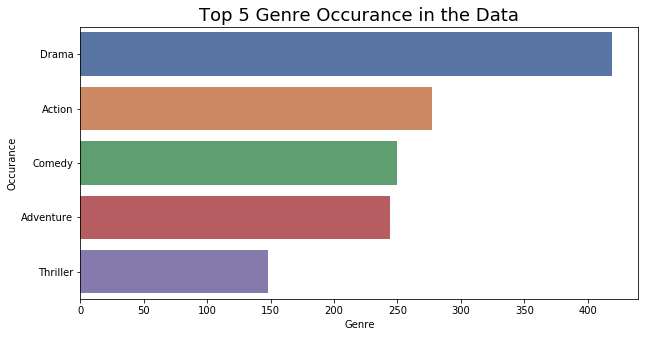

In [54]:
#Top 5 genre occurance in the data
most_ratedgenre = xgv.sort_values('Occurance', ascending = False).head(5).set_index('Genre')
plt.figure(figsize=(10,5))
sns.barplot(most_ratedgenre['Occurance'], most_ratedgenre.index, palette='deep')
plt.title("Top 5 Genre Occurance in the Data", fontsize=18)
plt.xlabel("Genre")
plt.ylabel("Occurance")
plt.show()

### By Actors

In [57]:
semua_actor = data_clean['Actors'].unique()
actors = semua_actor.tolist() 
spactors = data_clean["Actors"].str.split(",", n = 3, expand = True)
spactors.columns = ['Actor_1', 'Actor_2', 'Actor_3', 'Actor_4']

In [59]:
newactors = []
for index, data in spactors.iterrows():
    newactors.append(data.Actor_1)
    if data.Actor_2 is not None:
        newactors.append(data.Actor_2)
    if data.Actor_3 is not None:
        newactors.append(data.Actor_3)
    if data.Actor_4 is not None:
        newactors.append(data.Actor_4)

In [61]:
avc = Counter(newactors)
av = pd.DataFrame(avc, index = ['Jumlah'])
xav = av.transpose()
xav.reset_index(level=0, inplace=True)
xav.rename(columns={
        'index': 'Actor', 
        'Jumlah': 'Occurance'
    }, inplace=True)

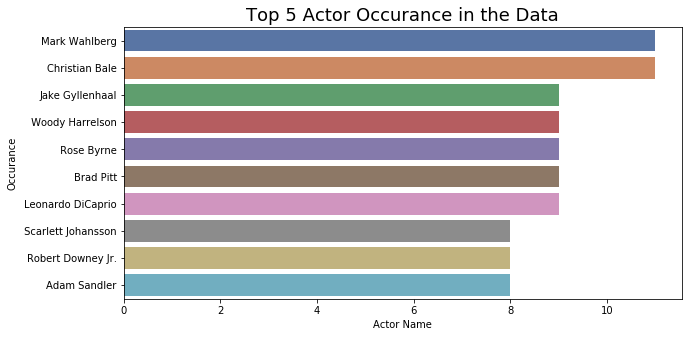

In [62]:
#Top 5 genre occurance in the data
most_occurac = xav.sort_values('Occurance', ascending = False).head(10).set_index('Actor')
plt.figure(figsize=(10,5))
sns.barplot(most_occurac['Occurance'], most_occurac.index, palette='deep')
plt.title("Top 5 Actor Occurance in the Data", fontsize=18)
plt.xlabel("Actor Name")
plt.ylabel("Occurance")
plt.show()

## Arigatou!